# Analyse


## importation

In [186]:
# importation of the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [187]:
#importation of the dataset
dataset = pd.read_csv('merged_data.csv')

In [188]:
dataset.head(5)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
0,Afghanistan,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000
1,Afrique du Sud,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755
2,Albanie,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485
3,Algérie,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035
4,Allemagne,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420


In [189]:
# check for value = 0
dataset[dataset == 0].count()


Zone                                             0
Disponibilité intérieure_dispo                   2
Exportations - Quantité_dispo                   89
Importations - Quantité_dispo                   21
Nourriture_dispo                                 2
Pertes_dispo                                   116
Production_dispo                                12
Valeur_population                                0
Exportations - quantité_import                  75
Exportations - valeur_import                    78
Importations - quantité_import                  12
Importations - valeur_import                    12
Valeur_pib                                       3
Outlets_kfc                                     69
Viande poids vif, poulet, totale_production     88
dtype: int64

In [190]:
# if values that are 0 are over 80 drop the columns
dataset = dataset.loc[:, dataset.isin([0]).sum() <= 80]

In [191]:
# drop countries with 'Outlets_kfc' = 0
dataset = dataset[dataset['Outlets_kfc'] != 0]

In [192]:
# drop exportation columns
dataset = dataset.drop(columns=['Exportations - quantité_import', 'Exportations - valeur_import',])

## Analyse dataset


In [193]:
#transformation en array numpy
dataset.set_index('Zone', inplace=True)
X = dataset.values
X.shape

(103, 9)

In [194]:
# preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [195]:
#new dataframe with the scaled values
df_scaled = pd.DataFrame( X_scaled, columns=dataset.columns, index=dataset.index)
df_scaled

,Disponibilité intérieure_dispo,Importations - Quantité_dispo,Nourriture_dispo,Production_dispo,Valeur_population,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc
Zone,,,,,,,,,
Afrique du Sud,1.278452,2.222101,1.284029,0.683425,0.120069,-0.357475,-0.184895,0.039151,3.731891
Albanie,-0.438436,-0.302057,-0.418288,-0.390391,-0.277726,-0.208891,-0.320496,-0.443895,-0.414408
Algérie,-0.247762,-0.492959,-0.232472,-0.220295,0.005266,-0.364664,0.198025,-0.237617,-0.453939
Allemagne,0.964256,3.961437,0.919246,0.584093,0.308573,6.235890,5.936998,4.385929,0.486006
Angola,-0.212944,0.965325,-0.188801,-0.371564,-0.079786,-0.312918,-0.368192,-0.300617,-0.423193
...,...,...,...,...,...,...,...,...,...
Ukraine,0.359076,0.138080,0.402900,0.387379,0.028038,1.857799,0.926089,-0.313793,-0.199187
Yémen,-0.273462,-0.089943,-0.255592,-0.289762,-0.094352,-0.300426,-0.197838,-0.436841,-0.458331
Zambie,-0.427658,-0.439931,-0.408869,-0.367019,-0.175058,-0.371391,-0.312875,-0.426987,-0.431977


In [196]:
# clustering hierarchique
Z = linkage(X_scaled, method='ward', metric='euclidean')

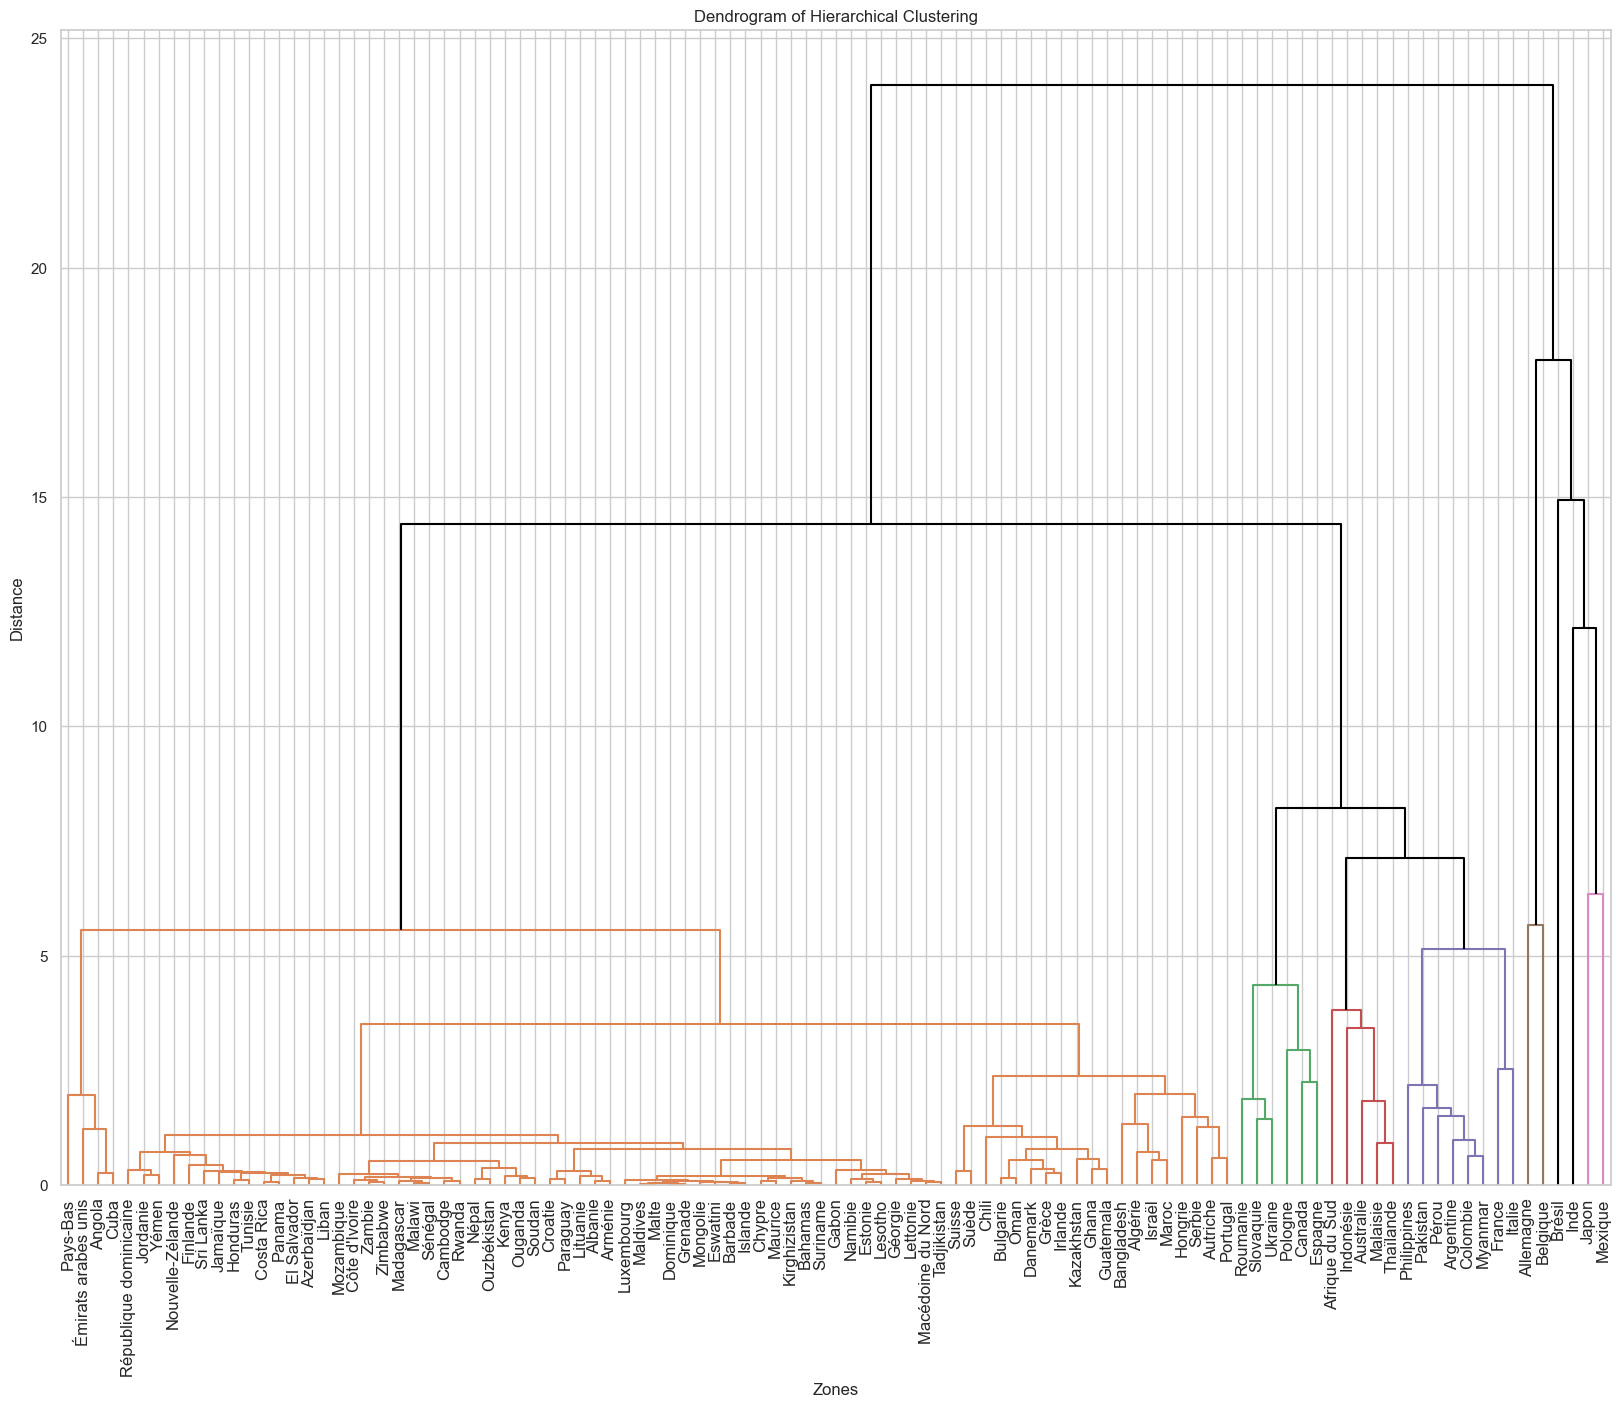

In [197]:
# dendrogram
plt.figure(figsize=(20, 15))
dendrogram(Z, labels=dataset.index, leaf_rotation=90, leaf_font_size=12, color_threshold=7, above_threshold_color='black')
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Zones')
plt.ylabel('Distance')
plt.show()

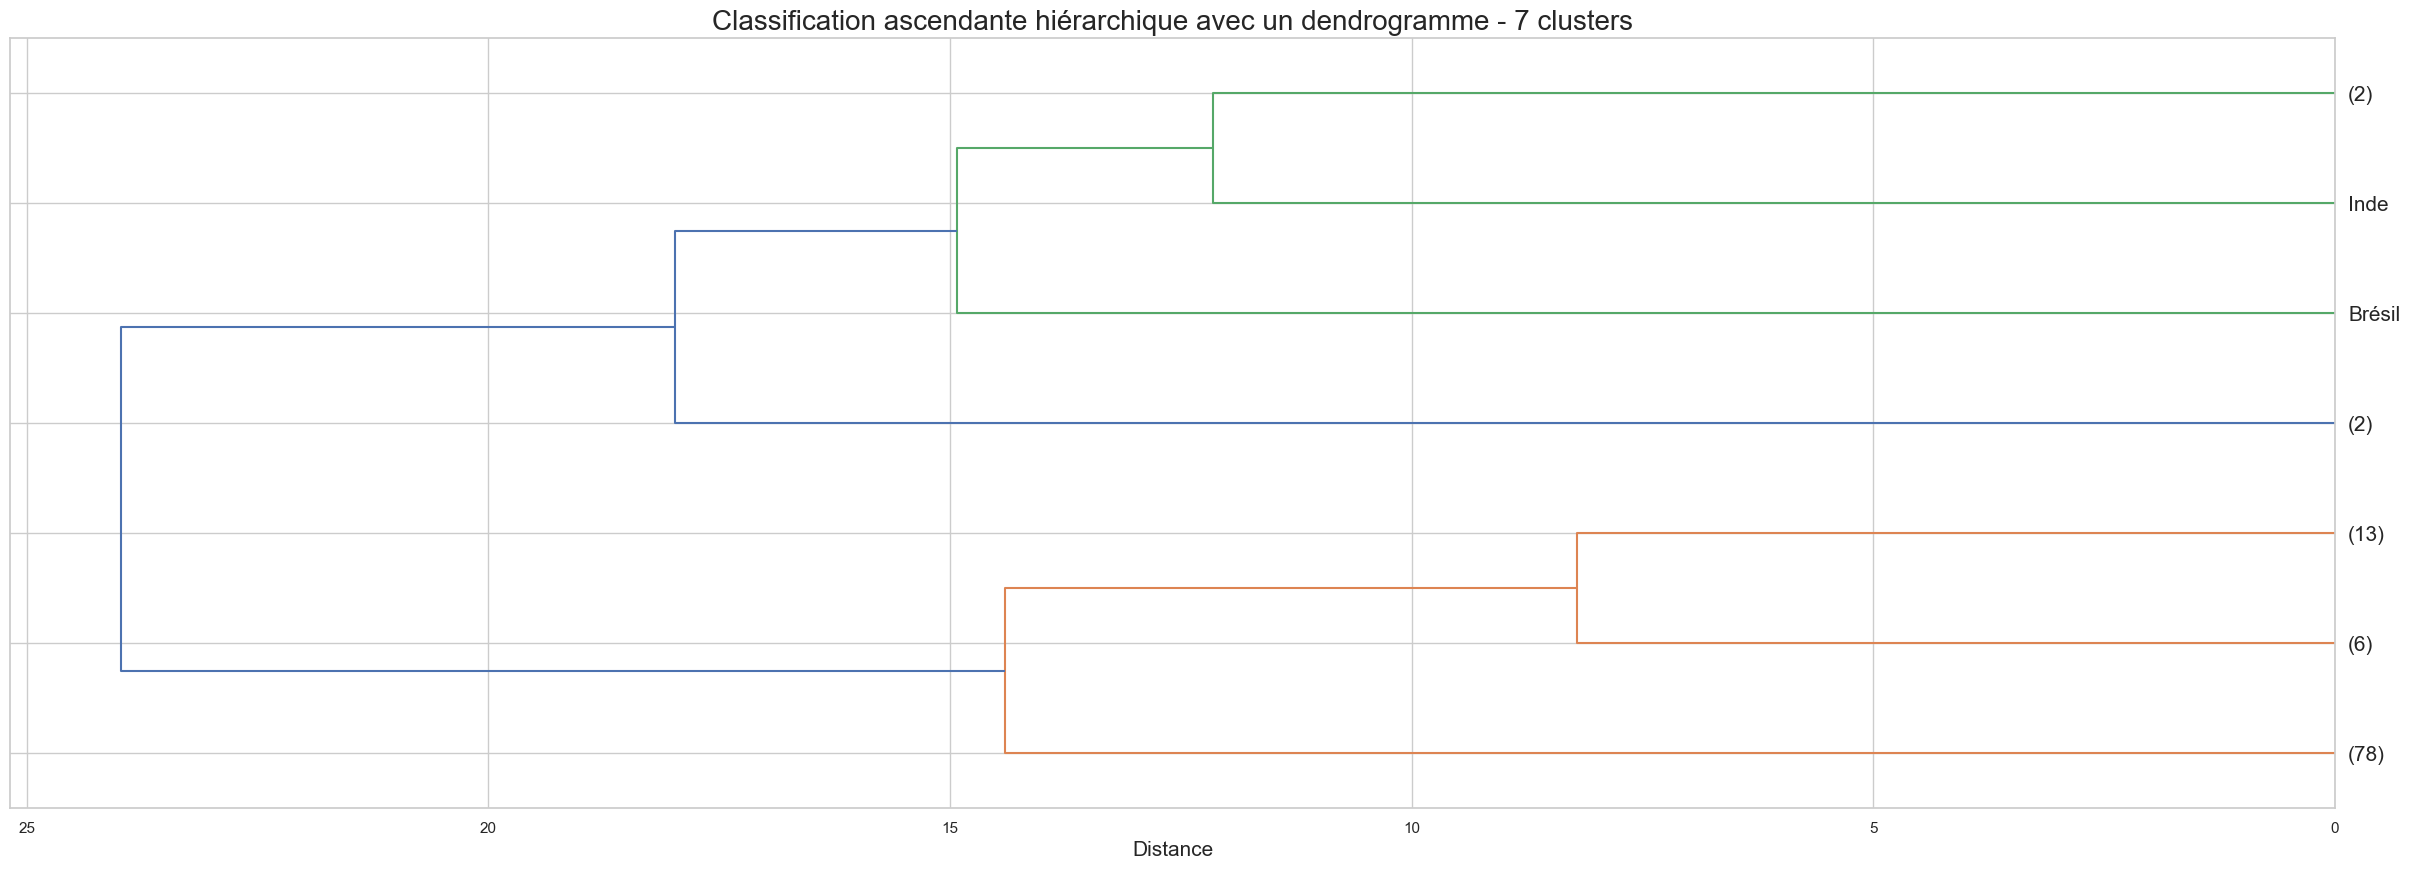

In [198]:
# regroupement du dendrogramme en 7 clusters

fig = plt.figure(figsize=(30,10))
plt.title('Classification ascendante hiérarchique avec un dendrogramme - 7 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = dataset.index, p=7, truncate_mode='lastp', leaf_font_size=15, orientation='left')

plt.show()

In [199]:
# identification des clusters
clusters = fcluster(Z, t=6, criterion='maxclust')
# affichage des pays selon les clusters
df_clusters = pd.DataFrame({'Zone': dataset.index, 'Cluster': clusters})

In [200]:
df_groupes_cah = pd.merge(dataset, df_clusters, on='Zone')


In [201]:
# split des données en fonction des clusters
clusters = []
for i in range(6):
    # on ajoute les données du cluster i
    clusters.append(df_groupes_cah[df_groupes_cah['Cluster'] == i + 1].drop(columns=['Cluster']))



In [202]:
df_groupes_cah.head(5)

,Zone,Disponibilité intérieure_dispo,Importations - Quantité_dispo,Nourriture_dispo,Production_dispo,Valeur_population,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,Cluster
0,Afrique du Sud,2.118000e+09,514000000.0,2.035000e+09,1.667000e+09,57009756.0,397000.0,7394000.0,3.808514e+11,955.0,2
1,Albanie,4.700000e+07,38000000.0,4.700000e+07,1.300000e+07,2884169.0,4572000.0,3266000.0,1.301973e+10,11.0,1
2,Algérie,2.770000e+08,2000000.0,2.640000e+08,2.750000e+08,41389189.0,195000.0,19051000.0,1.700970e+11,2.0,1
3,Allemagne,1.739000e+09,842000000.0,1.609000e+09,1.514000e+09,82658409.0,185661000.0,193759000.0,3.690849e+12,216.0,3
4,Angola,3.190000e+08,277000000.0,3.150000e+08,4.200000e+07,29816766.0,1649000.0,1814000.0,1.221239e+11,9.0,1


In [203]:
# mean values of each cluster without the cluster column zone
cluster_means = df_groupes_cah.drop(columns=['Zone']).groupby('Cluster').mean()
print(cluster_means)

         Disponibilité intérieure_dispo  Importations - Quantité_dispo  \
Cluster                                                                  
1                          1.428077e+08                   5.360256e+07   
2                          1.368789e+09                   1.250526e+08   
3                          9.455000e+08                   5.900000e+08   
4                          3.317000e+09                   1.020500e+09   
5                          3.661000e+09                   0.000000e+00   
6                          9.982000e+09                   3.000000e+06   

         Nourriture_dispo  Production_dispo  Valeur_population  \
Cluster                                                          
1            1.355641e+08      1.285128e+08       1.336757e+07   
2            1.234947e+09      1.477053e+09       6.598691e+07   
3            8.765000e+08      9.885000e+08       4.703908e+07   
4            3.208500e+09      2.732000e+09       1.261400e+08   
5          

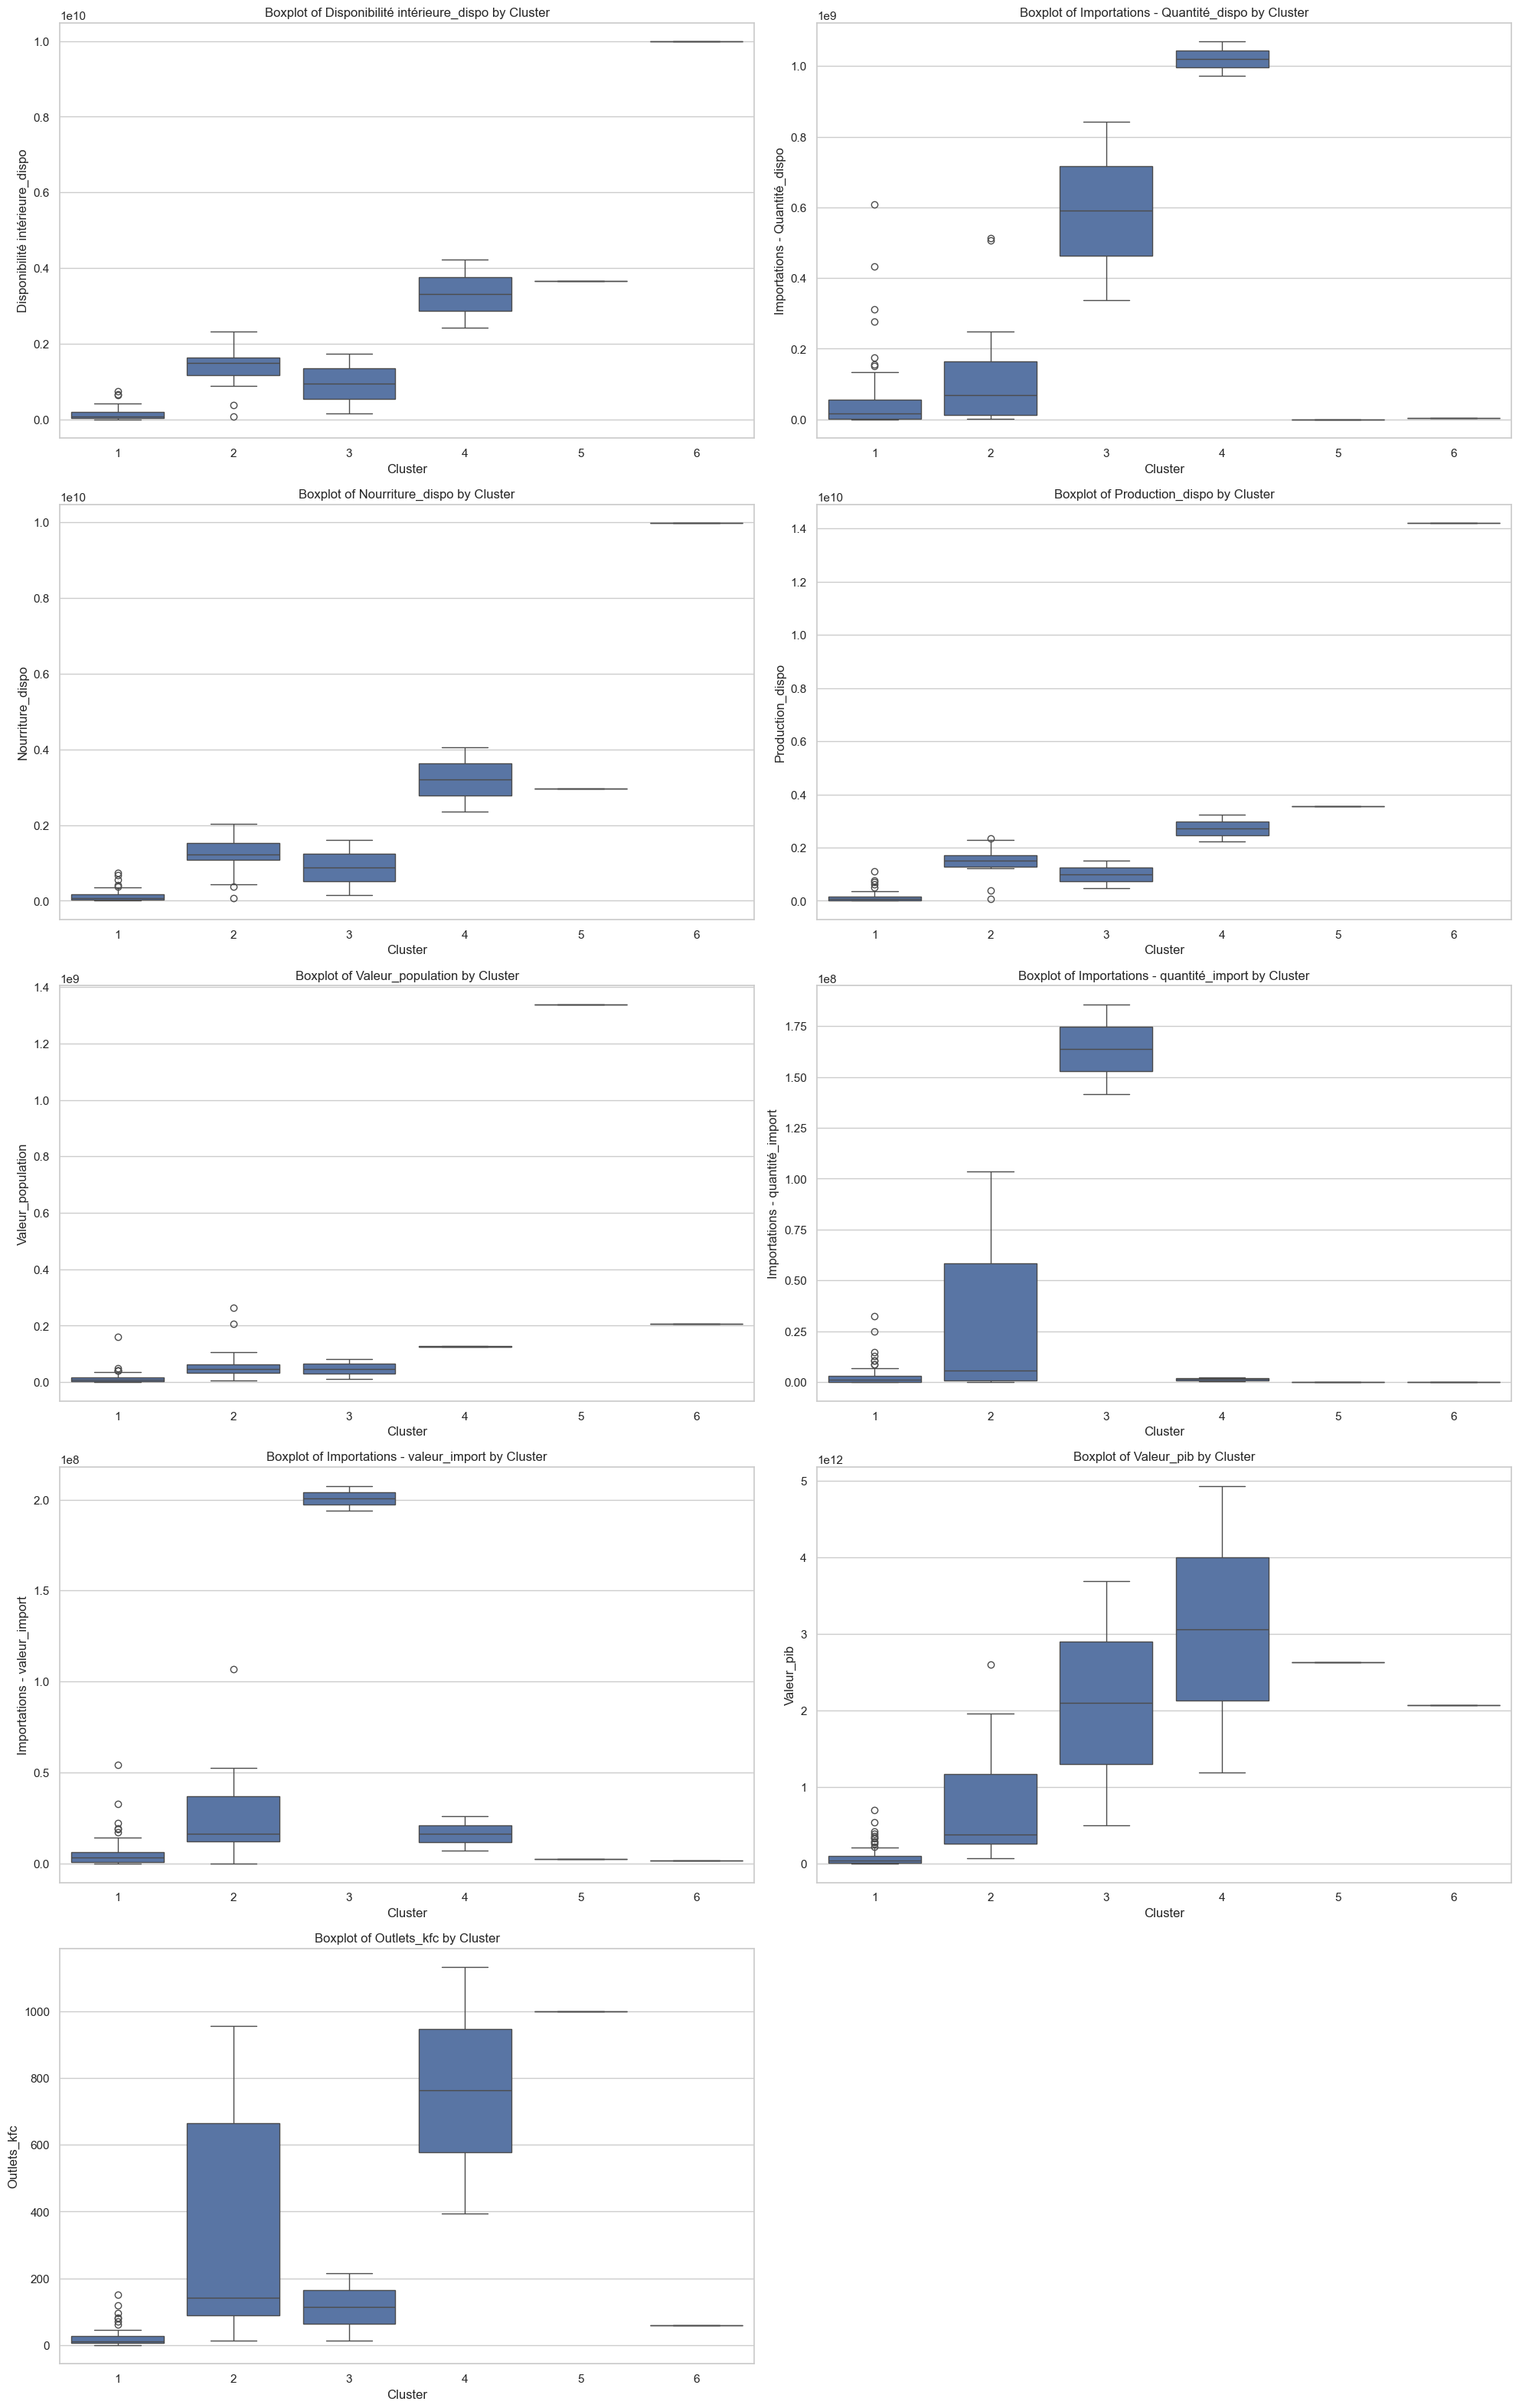

In [204]:
# comparison des clusters with boxplots 
plt.figure(figsize=(20, 50))
sns.set(style="whitegrid")
# variables à visualiser
variables = df_groupes_cah.drop(columns=['Zone', 'Cluster']).columns
# boxplot pour chaque variable
for i in range(len(variables)):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x='Cluster', y=variables[i], data=df_groupes_cah)
    plt.title(f'Boxplot of {variables[i]} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(variables[i])
    plt.tight_layout()
plt.show()

c:\Users\SKIKK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SKIKK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SKIKK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\SKIKK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

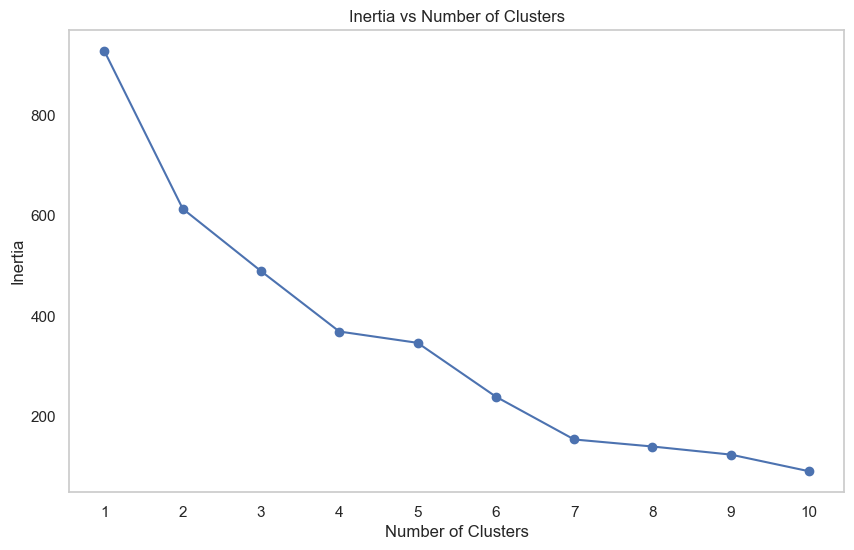

In [205]:
# k-means clustering
# intertia
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# plot of inertia
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [209]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
# add cluster labels to the original dataset
df_groupes_kmeans = pd.DataFrame({'Zone': dataset.index, 'Cluster': kmeans.labels_})
df_groupes_kmeans = pd.merge(dataset, df_groupes_kmeans, on='Zone')
# mean values of each cluster without the cluster column zone
cluster_means_kmeans = df_groupes_kmeans.drop(columns=['Zone']).groupby('Cluster').mean()
print(cluster_means_kmeans)

         Disponibilité intérieure_dispo  Importations - Quantité_dispo  \
Cluster                                                                  
0                          1.419367e+08                   5.372152e+07   
1                          1.365500e+09                   1.275000e+08   
2                          9.455000e+08                   5.900000e+08   
3                          3.317000e+09                   1.020500e+09   
4                          1.886857e+09                   1.118571e+08   
5                          9.982000e+09                   3.000000e+06   

         Nourriture_dispo  Production_dispo  Valeur_population  \
Cluster                                                          
0            1.348101e+08      1.277848e+08       1.326732e+07   
1            1.227417e+09      1.494917e+09       6.375095e+07   
2            8.765000e+08      9.885000e+08       4.703908e+07   
3            3.208500e+09      2.732000e+09       1.261400e+08   
4          

c:\Users\SKIKK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [207]:
# count of countries in each cluster
cluster_counts_kmeans = df_groupes_kmeans['Cluster'].value_counts().sort_index()
cluster_counts_kmeans 

Cluster
0    79
1    12
2     2
3     2
4     6
5     1
6     1
Name: count, dtype: int64

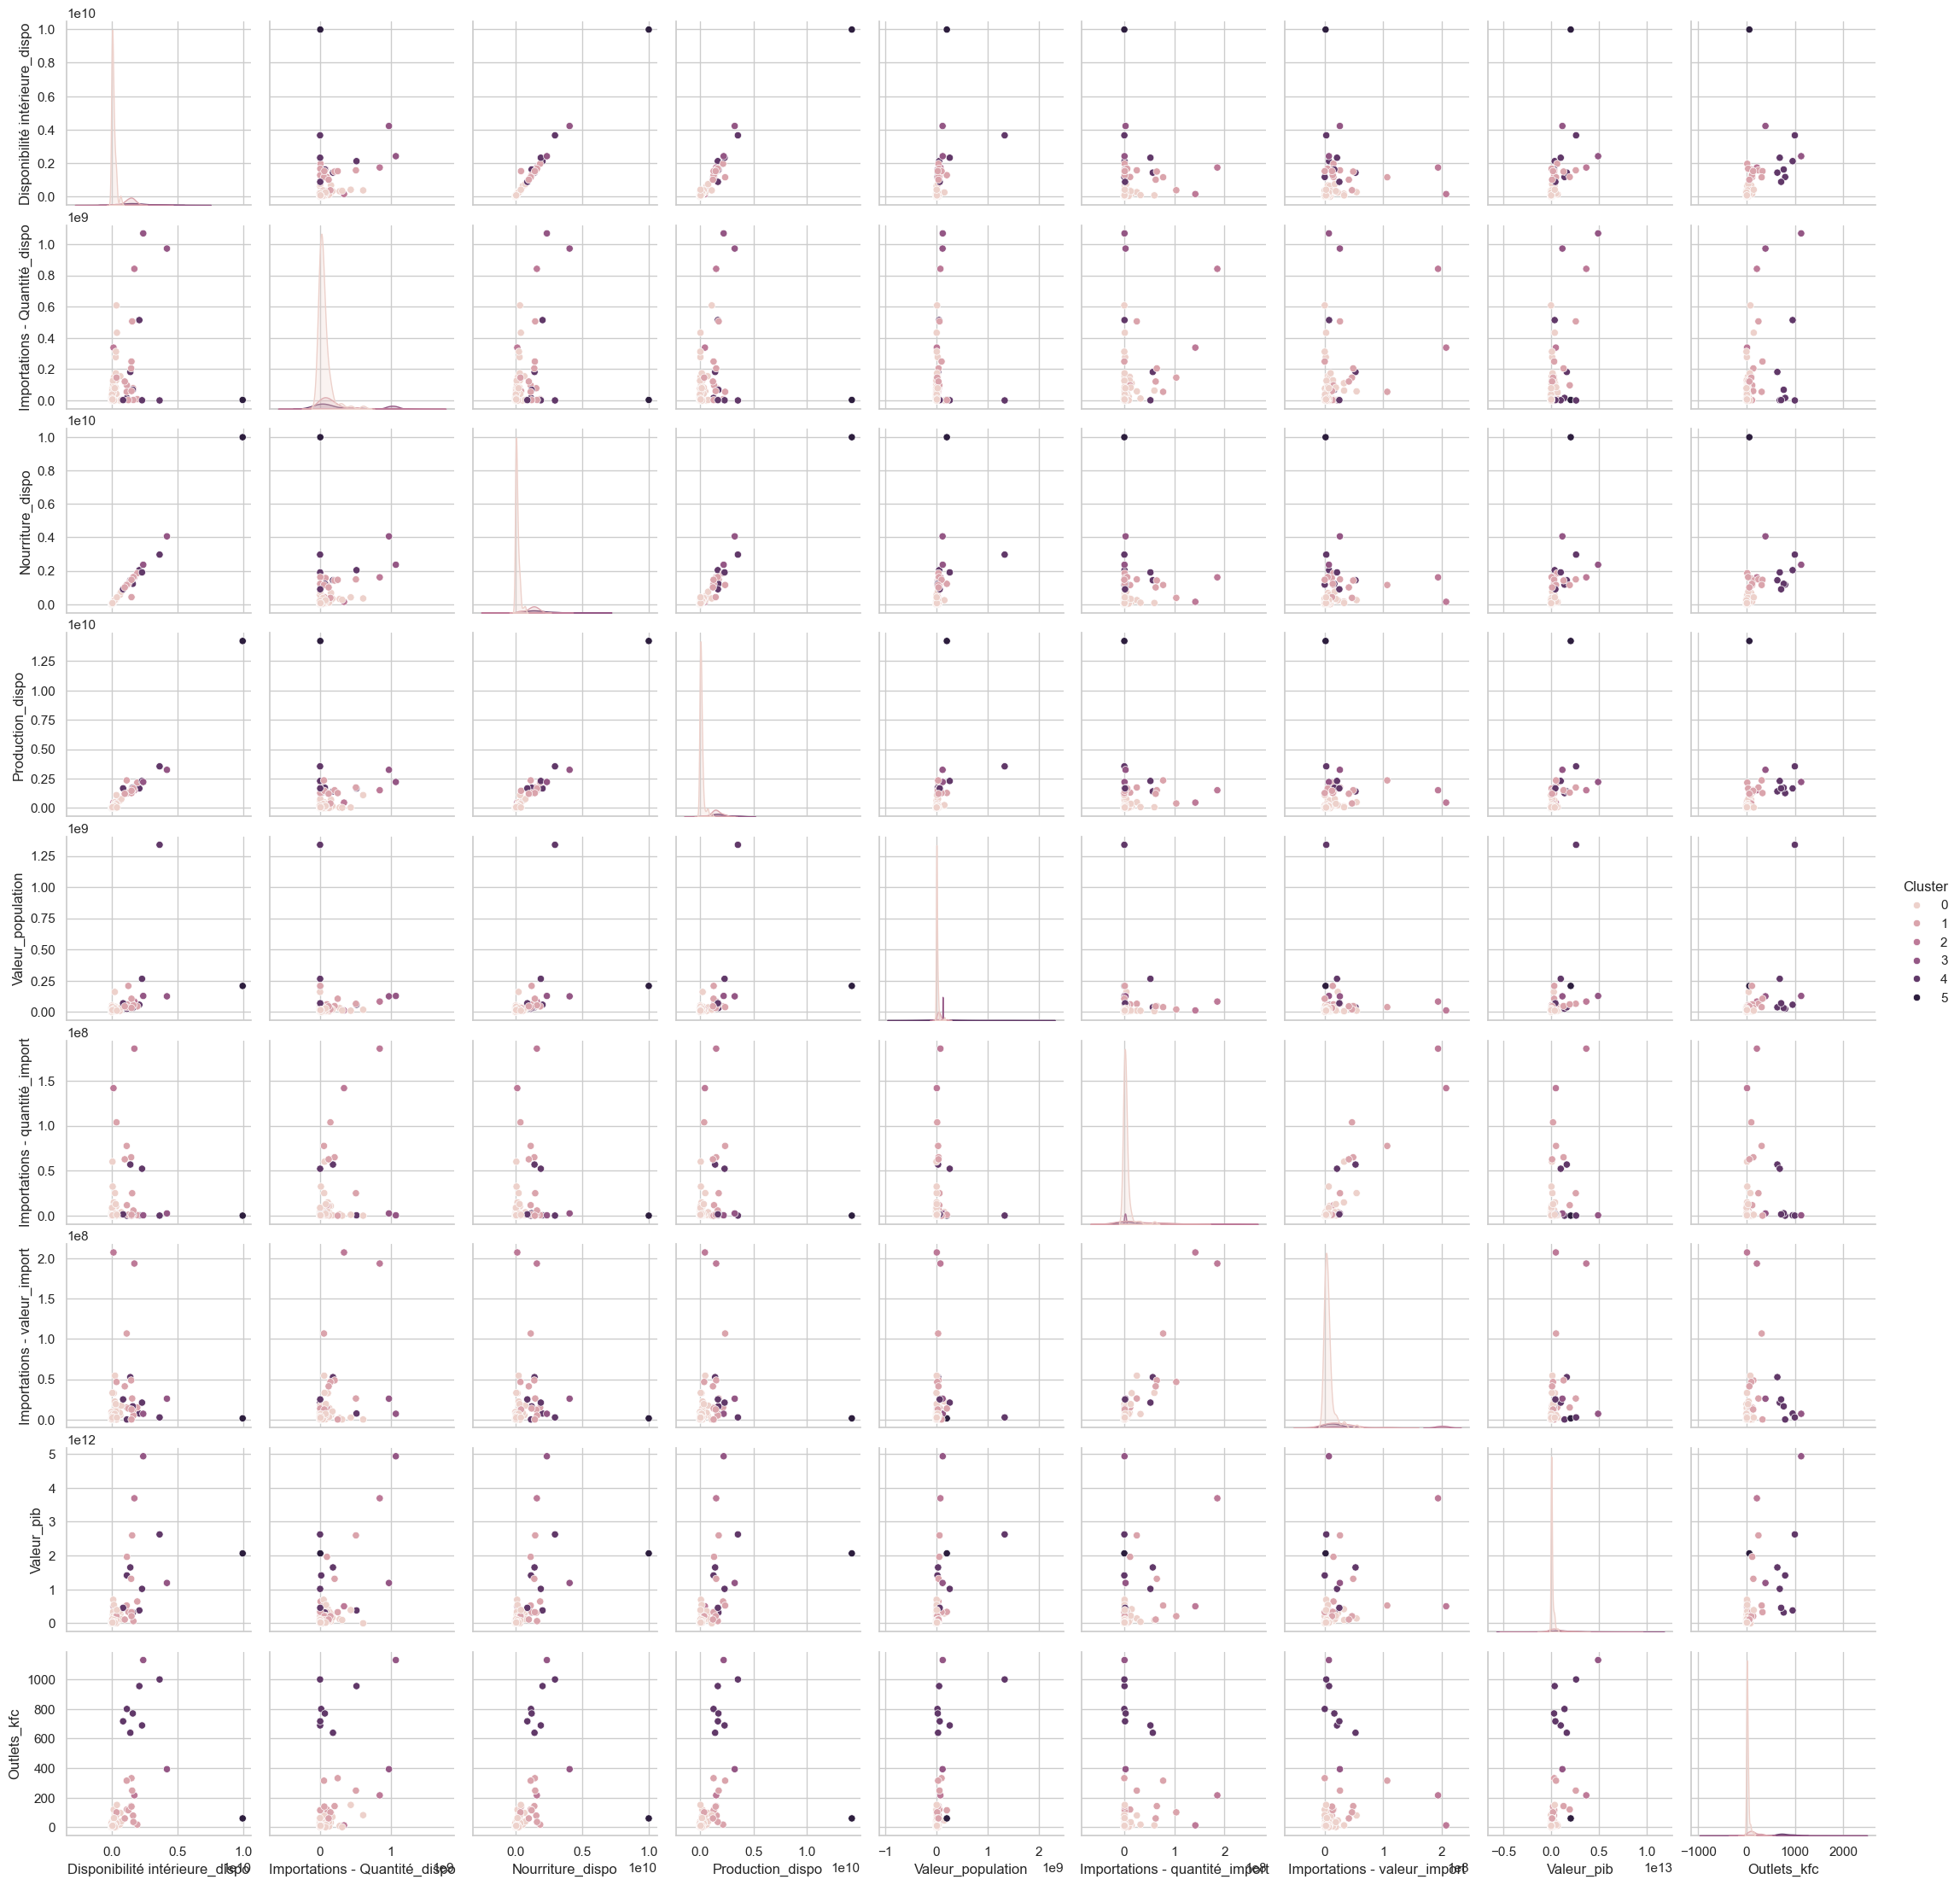

In [213]:
sns.pairplot(df_groupes_kmeans, hue="Cluster")
colors = sns.color_palette("husl", 6)

## Analyse ACP


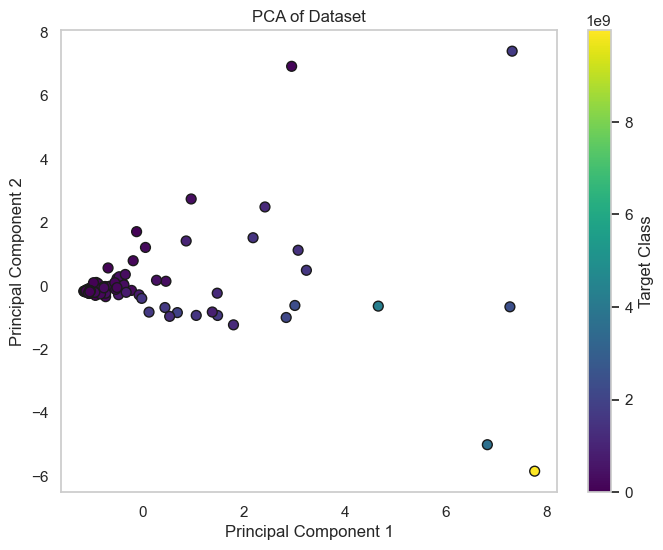

In [208]:
# Acp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = dataset.iloc[:, 1:11].values
# Standardization of the data
sc = StandardScaler()
X_std = sc.fit_transform(X)
# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)
# Explained variance
explained_variance = pca.explained_variance_ratio_
# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset['Disponibilité intérieure_dispo'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.grid()
plt.show()
